# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.





Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [ ]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

### Füge hier alle benötigten Libaries ein:
---

In [ ]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

## Manuelle Installation 
---

In [17]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [19]:
df = pd.read_csv("Data/wage.csv", sep=';')
#df['metro'] = df['metro'].astype('category')

#### Begutachte deine Daten:

In [ ]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

In [ ]:
df.info()

In [ ]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [ ]:
df.describe().round(3)


# save output of the describtion as a text file
# with open('Regression_Output/out.txt', 'w') as f:
#     f.write(df.describe().round(2).to_string()) 

Solltest du im folgenden mehrere NaN values haben, wähle eine der folgenden Optionen:
1. Lösche die Zeilen mit NaN values
2. Fülle die NaN values mit einem Wert deiner Wahl
3. Fülle die NaN values mit dem Durchschnittswert der Spalte (mean, mode, median)

In [ ]:
df.isnull().sum()

In [25]:
# Lösche die Zeilen mit NaN values 
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl
#df = df.fillna()

# Fülle die NaN values mit dem Durchschnittswert der Spalte
#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

## Filterung der Daten

weitere Informationen findest du im Leitfaden
Daten filterung:

1. Filterung nach einer Kondition:

`df_filtered = df[df["wage"] > 12.00]`

In [ ]:
df_filtered = df[df["wage"] > 12]
df_filtered

2. Filterung mit mehreren Kondition 

`df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12)]`

In [ ]:
df_filtered_educ = df[(df["wage"] > 12.00) & 
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1) ] # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
df_filtered_educ

# Visualisierungen:

In [ ]:
if not os.path.exists("Vis"):
    print("Ordner Vis erstellt")
    os.makedirs("Vis") 
elif os.path.exists("Vis"):
    print("Ordner Vis ist bereits vorhanden")

## Histogramm
---

In [ ]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
# plt.savefig("Vis/Title_") # speicher die Visualisierung

### Korrelations Matrix
---
Folgenden Methoden sind möglich: `pearson, kendall, spearman`

In [ ]:
sns.heatmap(df.corr(method = "pearson", numeric_only=True), annot=True) 
# in "method" kann du folgenden Mehthoden aussuchen pearson, kendall, spearman
# plt.savefig("Vis/Title_")

## Scatterplot
---

In [ ]:
sns.scatterplot(data=df, x="exper", y="wage", alpha=0.5) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
# plt.savefig("Vis/Title_") 

## Balkendiagramm
---

In [ ]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
# plt.savefig("Vis/Title_")

## Regressions Analyse
---
Packages

In [33]:
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Lege deine Abhängige und Unabhänige Varaible fest

In [34]:
X = df[["educ", "exper", "metro"]]
y = df["wage"]

### Erstelle deine Regression:
1. Möglichkeit:

In [ ]:
X = sm.add_constant(X)
model_stats = sm.OLS(y, X)
model = model_stats.fit()

print(model.summary())


with open('Regression_Output/summary.txt', 'w') as fh:
    fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

In [ ]:
parameter = model.params
parameter

Formel: y_hat = intercept + b1 * educ + b1 * exper + b1 * educ + b1 * metro

In [ ]:
educ = 0
exper = 0
metro = 0

y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro

y_hat

### 2. Möglicheit die mehr an R erinnert:

In [ ]:
from statsmodels.formula.api import ols 
linear_model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()
linear_model.summary()

## Konfidenz Intervalle:
---

In [ ]:
# Calculate the 99% confidence intervals for the model's parameters
conf_intervals = linear_model.conf_int(alpha=0.01)
conf_intervals = conf_intervals.rename(columns={0: '0.5 %', 1: '99.5 %'})
conf_intervals


## Vorhersagen treffen:

In [ ]:
prediction = linear_model.predict(df[["educ","exper","metro"]])
prediction[:5] # Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]

In [ ]:
sns.scatterplot(x=prediction, y=df["wage"])
plt.title("Tatsächliche Werte vs Vohergesagten Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vohergesagten Werte")
plt.savefig("Vis/Title_")

## Residuale 
---

### Residuale berechen

1. Möglichkeit durch eine eingbaute Funktion:

In [ ]:
residuals = linear_model.resid
residuals

2. Möglichkeit eigene berechnung:

In [ ]:
residuals_model = df["wage"] - prediction # tatsächliche Werte - Vorhersagen
residuals_model

In [ ]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df["wage"] - df["wage"].mean())**2).sum()

# R-squared
R_squared = 1 - (SSResiduals/SSTotal)
print("R_squared:", R_squared)

In [ ]:
# Vorhersagen (Predictions)
predictions = linear_model.fittedvalues

# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(x=predictions, y=residuals, alpha = 0.5)
plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")
plt.savefig("Vis/Title_Residuals_vs_Predictions.png")
plt.show()


In [ ]:
print(linear_model.fittedvalues.mean())
print(linear_model.predict().mean())

In [ ]:
sns.residplot(x=prediction, y=residuals)

In [ ]:
model_residuals = model.resid
sns.histplot(model_residuals, kde=True, bins=25)
plt.savefig("Vis/Title_")

In [ ]:
fig = sm.qqplot(residuals, line="r")
plt.show()

### Analysis of variance (Anova)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

## Simple Lineare Regression aufbauen
---

In [ ]:
sns.regplot(data = df, x="educ", y ="wage")
plt.savefig("Vis/Title_")

In [ ]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
# plt.savefig("Vis/Title_")

In [ ]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

# plt.savefig("Vis/Title_")

### Analysis of variance (Anova)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

## Heteroskedasticity testen

In [55]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [ ]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    linear_model.resid, linear_model.model.exog)


print(f"LM Statistic: {bp_lm}")
print(f"LM p-value: {bp_lm_pvalue}")
print(f"F Statistic: {bp_fvalue}")
print(f"F p-value: {bp_f_pvalue}")

In [ ]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

## Multikollinearität
---

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Berechnung nur für die Variablen in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Berechne den VIF für jede unabhängige Variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


## Polynomial-Regression
---

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
ice_creamdf = pd.read_csv("Data/ice_cream_sales.csv", sep=',')
ice_creamdf.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [18]:
X_poly = ice_creamdf["Temperature (°C)"].values.reshape(-1,1)
y_poly = ice_creamdf["Ice Cream Sales (units)"].values

In [26]:
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(X_poly)
xp.shape

(49, 6)

In [27]:
model_poly = sm.OLS(y_poly, xp).fit()
ypred_poly = model_poly.predict(xp) 

ypred_poly.shape

(49,)

In [32]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           5.58e-26
Time:                        13:52:09   Log-Likelihood:                -120.67
No. Observations:                  49   AIC:                             253.3
Df Residuals:                      43   BIC:                             264.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1048      0.822      2.562      0.014       0.448       3.762
x1            -2.2269      0.694     -3.208      0.003      -3.627      -0.827
x2             2.2250      0.215     10.349      0.000       1.791       2.659
x3             0.1795      0.116      1.552      0.128      -0.054       0.413
x4            -0.0207      0.011     -1.945      0.058      -0.042       0.001
x5            -0.0046      0.004     -1.063      0.294      -0.013       0.004
==============================================================================
Omnibus:                        4.424   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.489
Skew:                          -0.635   Prob(JB):                        0.175
Kurtosis:                       3.307   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

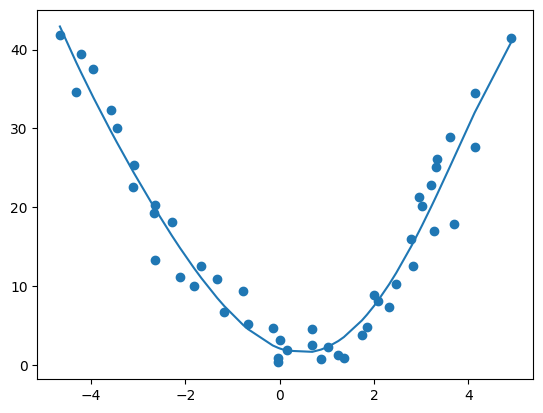

In [30]:
plt.scatter(X_poly,y_poly)
plt.plot(X_poly,ypred_poly)

## Log Log Model:

---

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'X': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 4, 8, 16, 32]
}

df = pd.DataFrame(data)

# Logarithmieren der Variablen
df['log_X'] = np.log(df['X'])
df['log_y'] = np.log(df['y'])

# Hinzufügen einer Konstante für den Intercept
X_log = sm.add_constant(df['log_X'])

# Erstelle das log-log Modell
model = sm.OLS(df['log_y'], X_log)
results = model.fit()

# Ausgabe der Ergebnisse
print(results.summary())

# Vorhersagen treffen
y_pred_log = results.predict(X_log)


                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.76
Date:                Wed, 02 Oct 2024   Prob (F-statistic):            0.00156
Time:                        13:51:53   Log-Likelihood:                -1.2669
No. Observations:                   6   AIC:                             6.534
Df Residuals:                       4   BIC:                             6.117
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3435      0.309     -1.110      0.3

/Users/riccardo/Desktop/Github/Python-Crashkurs/venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
